In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\default-of-credit-card-clients-dataset\UCI_credit_card.csv")
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Deatils

In [3]:
#The goal of the analysis is to construct such a model that will predict if a person will fail on paying his/her credit or not.
#ID: ID of each client
#LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
#SEX: Gender (1=male, 2=female)
#EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
#MARRIAGE: Marital status (1=married, 2=single, 3=others)
#AGE: Age in years
#PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)                                      
#PAY_2: Repayment status in August, 2005 (scale same as above)                                            
#PAY_3: Repayment status in July, 2005 (scale same as above)
#PAY_4: Repayment status in June, 2005 (scale same as above)
#PAY_5: Repayment status in May, 2005 (scale same as above)
#PAY_6: Repayment status in April, 2005 (scale same as above)
#BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
#BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
#BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
#BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
#BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
#BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
#PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
#PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
#PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
#PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
#PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
#PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
#default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
#sample
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
26913,26914,20000.0,1,1,1,44,0,0,0,0,...,17144.0,17855.0,18567.0,1600.0,1600.0,1300.0,1000.0,1000.0,950.0,1
14206,14207,50000.0,1,2,1,46,0,0,0,2,...,19328.0,37113.0,19165.0,2000.0,3258.0,0.0,679.0,1528.0,587.0,0
10462,10463,330000.0,2,1,1,36,0,0,0,0,...,100218.0,100334.0,98097.0,10500.0,4074.0,3600.0,4005.0,3600.0,3400.0,0
21197,21198,20000.0,1,2,1,31,0,0,0,0,...,20570.0,19980.0,19990.0,1610.0,1488.0,1600.0,400.0,400.0,400.0,0
91,92,280000.0,2,1,2,39,-1,-1,-1,0,...,3868.0,0.0,0.0,0.0,3968.0,0.0,0.0,0.0,0.0,0


In [5]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [6]:
# Categorical variables description
df[['SEX','EDUCATION','MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [7]:
#No missing data, but a few anomalous things:

#EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
#MARRIAGE has a label 0 that is undocumented

In [8]:
#payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [9]:
#They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly'
#and every negative value should be seen as a 0. But we will get to that later

In [10]:
# Bill Statement description
df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [11]:
#Negative values can be interpreted as credit? Has to be investigated

In [12]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [13]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [14]:
#rename
df = df.rename(columns={'default.payment.next.month':'def_pay',
                        'PAY_0':'PAY_1'})
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [15]:
#default Probability
#df.def_pay.sum() / len(df.def_pay)

In [16]:
print(df.shape)
print(df.shape[0])
print(df.def_pay.count())
print(len(df.axes[1]))

(30000, 25)
30000
30000
25


In [17]:
y = df.def_pay
remove_unwanted_columns = ['ID']
x = df.drop(remove_unwanted_columns,axis=1)
x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

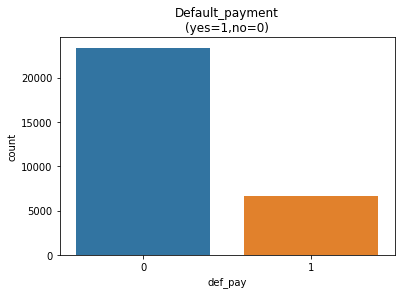

In [18]:
plt.title('Default_payment\n(yes=1,no=0)')
sns_plot = sns.countplot(y,label='count')

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,shuffle=True)

GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred = GNB.predict(x_test)
print('predict:',y_pred)
print('score:',GNB.score(x_test,y_test))

predict: [1 1 0 ... 1 1 1]
score: 0.36822222222222223


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,shuffle=True)

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)
print('predict:',y_pred)
print('score:',RFC.score(x_test,y_test))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


predict: [0 1 0 ... 0 0 0]
score: 1.0


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,shuffle=True)

Lo_reg = LogisticRegression()
Lo_reg.fit(x_train,y_train)
y_pred = Lo_reg.predict(x_test)
print('predict:',y_pred)
print('score:',Lo_reg.score(x_test,y_test))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


predict: [0 0 0 ... 0 0 0]
score: 0.781


In [ ]:
#Amount of credit limit grouped by default payment next month
#Let's visualize the density plot for amount of credit limit (LIMIT_BAL), grouped by default payment next month

In [ ]:
class_0 = x.loc[x['def_pay'] == 0]["LIMIT_BAL"]
class_1 = x.loc[x['def_pay'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

In [ ]:
var_ = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize = (10,10))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = x[var_].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

In [ ]:
var_ = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize = (10,10))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = x[var_].corr()
sns.heatmap(corr,annot=True,annot_kws={'size': 11},linewidths=0.5,xticklabels= var_, yticklabels= var_,
           cmap= 'coolwarm') 
plt.show()